In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [95]:
df=pd.read_csv('../DATA/rock_density_xray.csv')

In [96]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [97]:
df.columns=['Signal','Density']

<Axes: xlabel='Signal', ylabel='Density'>

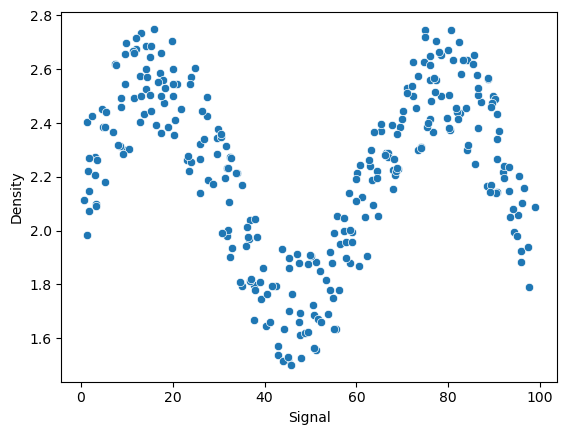

In [98]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [99]:
X=df['Signal'].values.reshape(-1,1)

In [100]:
y=df['Density']

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr_model=LinearRegression()

In [105]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [106]:
lr_pred=lr_model.predict(X_test)

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [108]:
mean_absolute_error(y_test,lr_pred)

0.211198973318633

In [109]:
np.sqrt(mean_squared_error(y_test,lr_pred))

0.2570051996584629

In [110]:
signal_range=np.arange(0,100)
signal_preds=lr_model.predict(signal_range.reshape(-1,1))

In [111]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

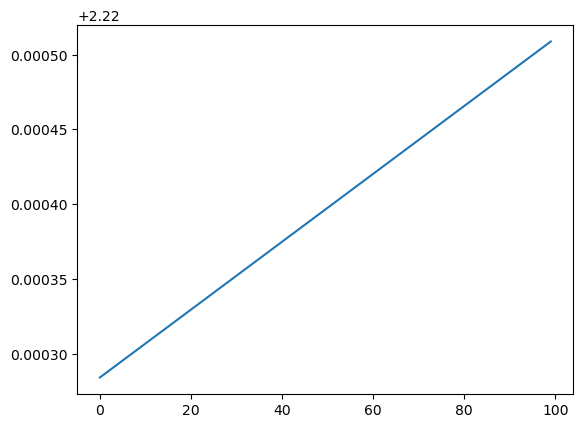

In [112]:
plt.plot(signal_range,signal_preds)

In [113]:
x1=df['Signal'].values.reshape(-1,1)

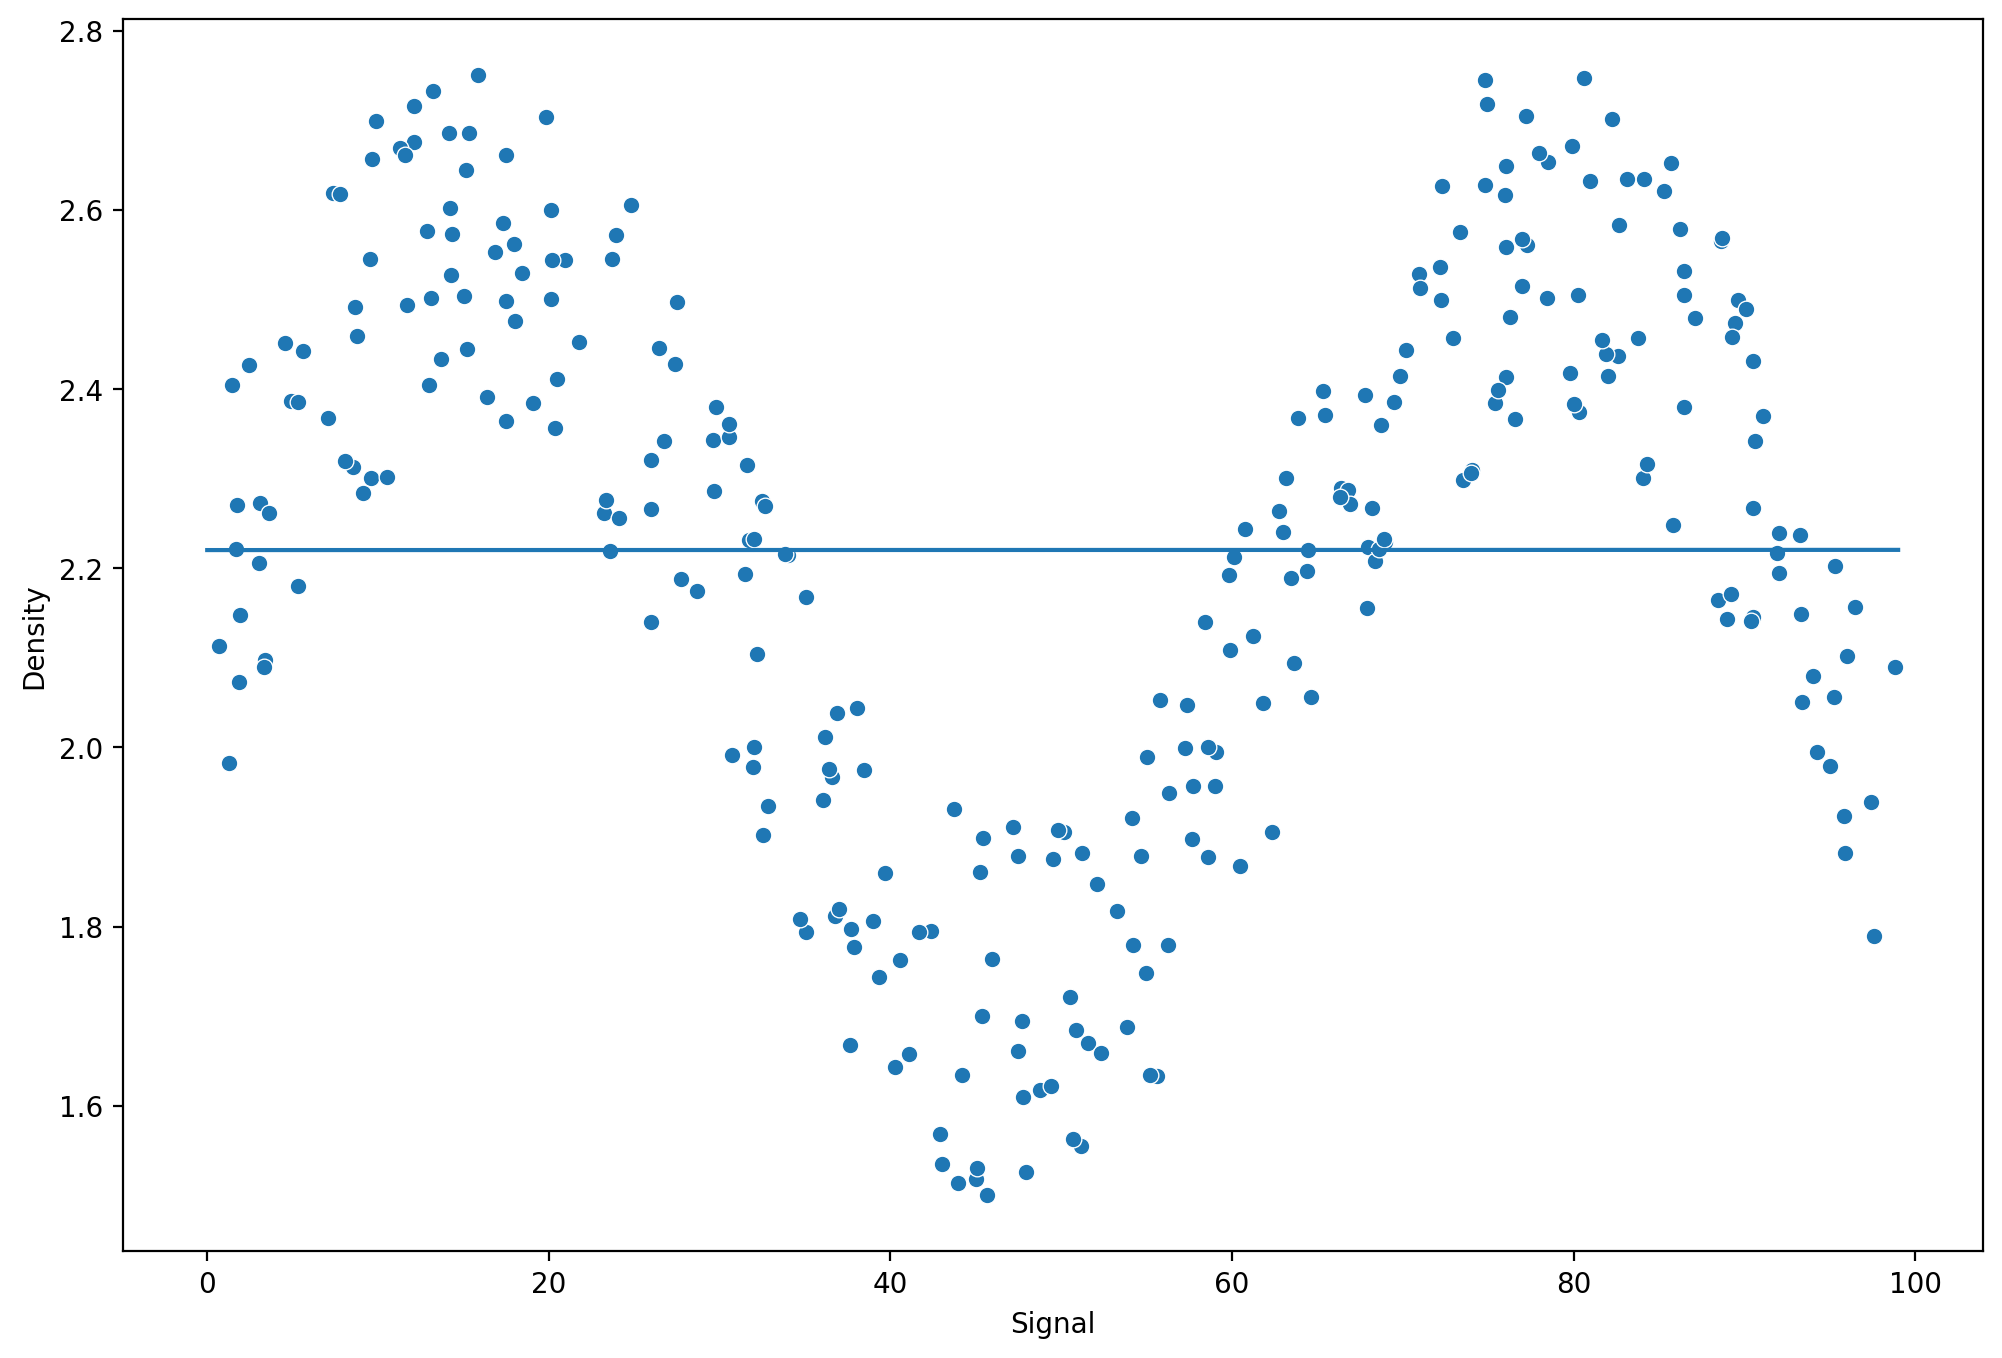

In [114]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_preds)
plt.show()

In [125]:
def run_model(model,X_train,y_train,X_test,y_test):
    #FIT THE MODEL
    model.fit(X_train,y_train)
    #GET METRICES
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f"RMSE:{rmse}")
    print(f"MAE:{mae}")



    #PLOT THE MODEL
    signal_range=np.arange(0,100)
    signal_preds=model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')

    plt.plot(signal_range,signal_preds)



RMSE:0.2570051996584629
MAE:0.211198973318633


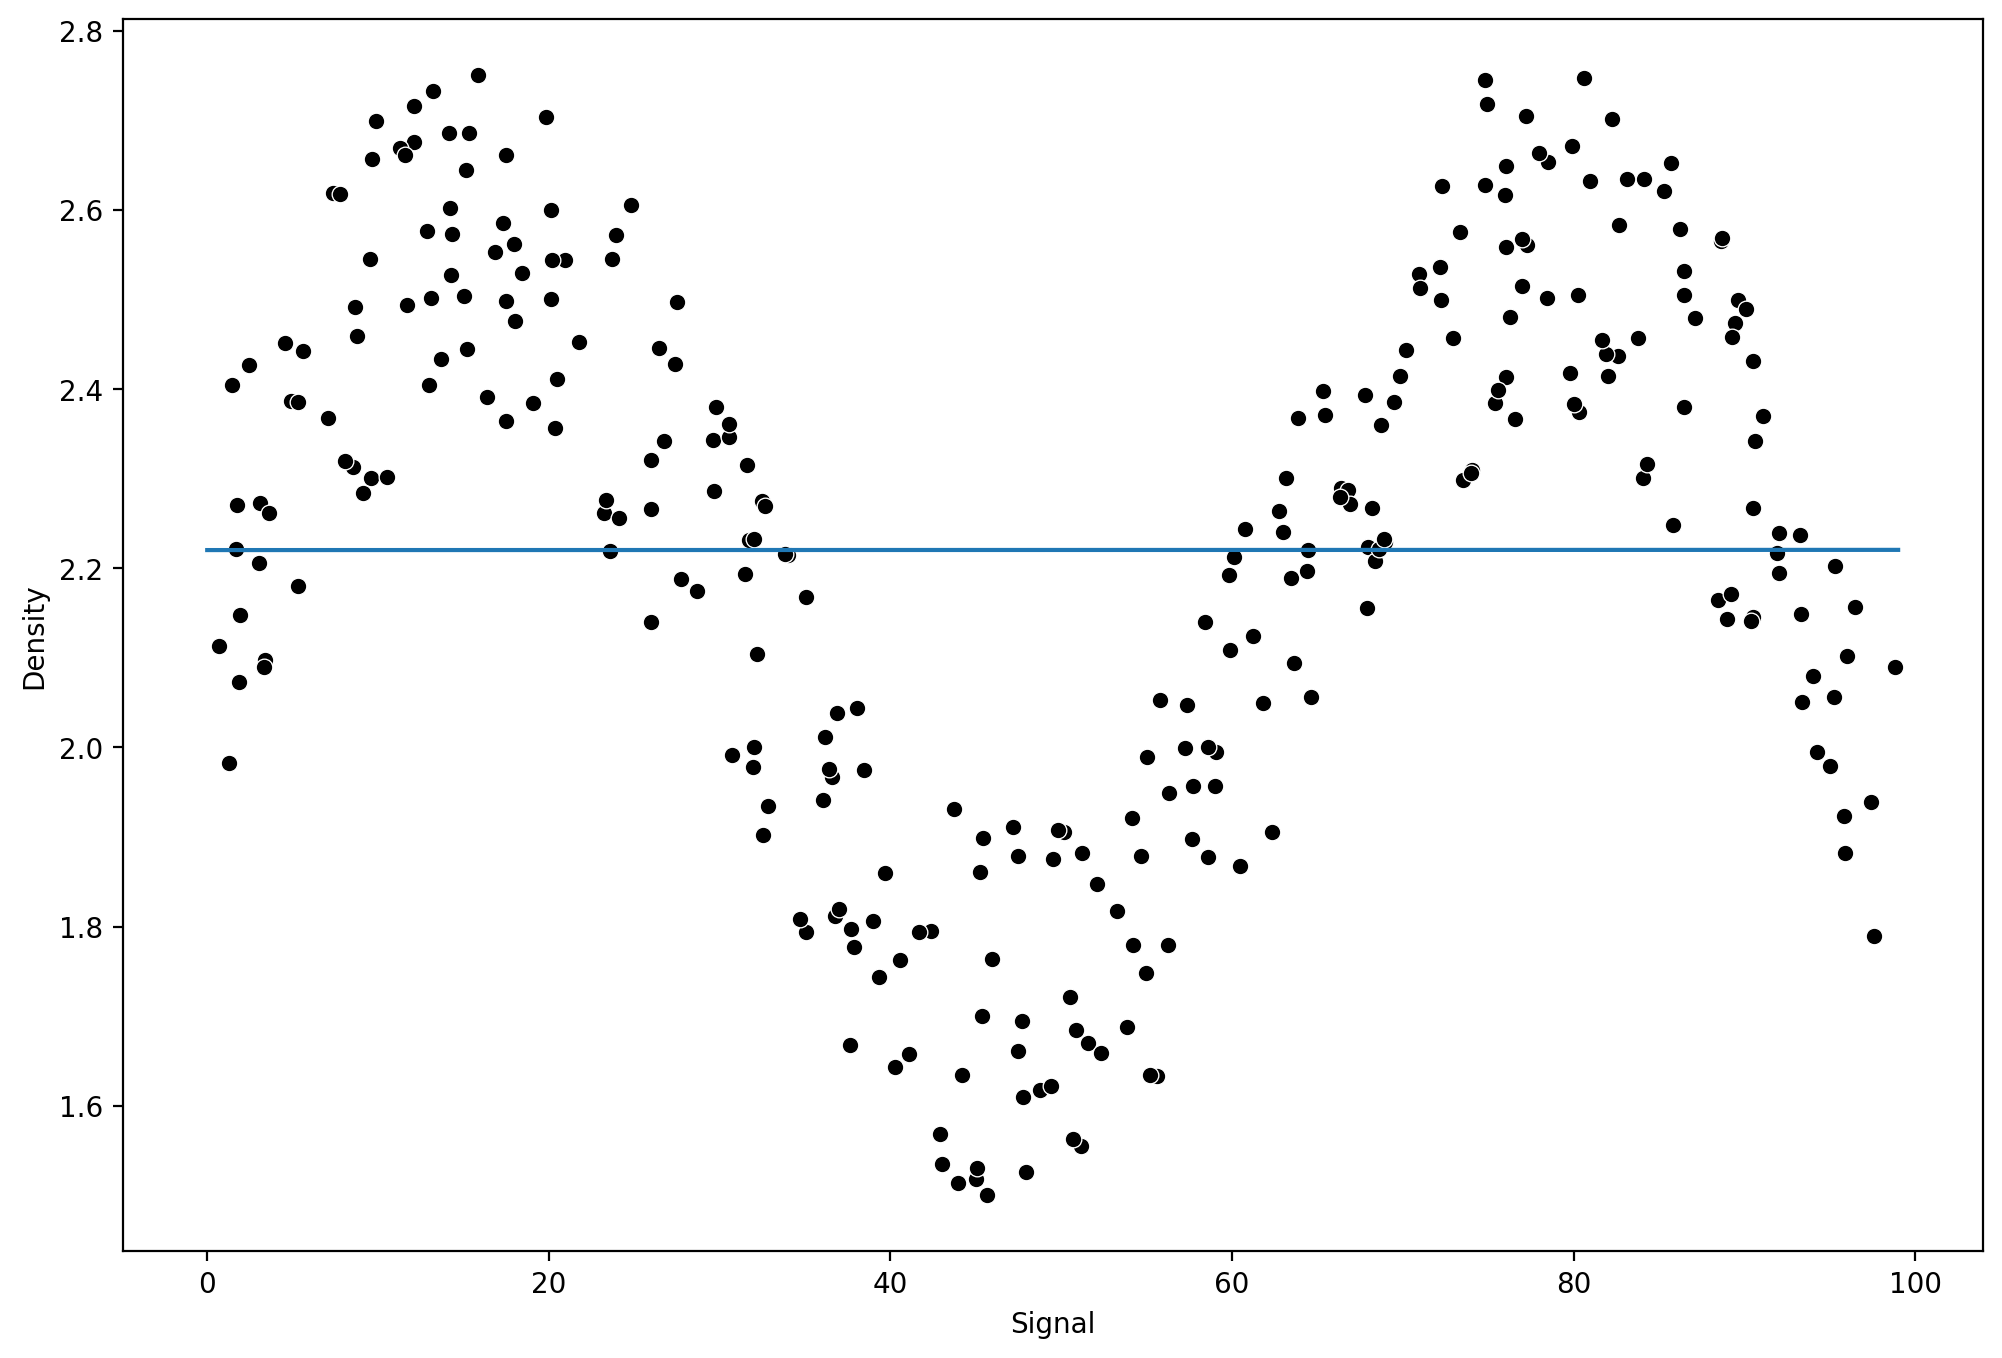

In [126]:
model=LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [127]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [130]:
pipe=make_pipeline(PolynomialFeatures(degree=6),LinearRegression()) 

RMSE:0.1380734969692501
MAE:0.11969063553529992


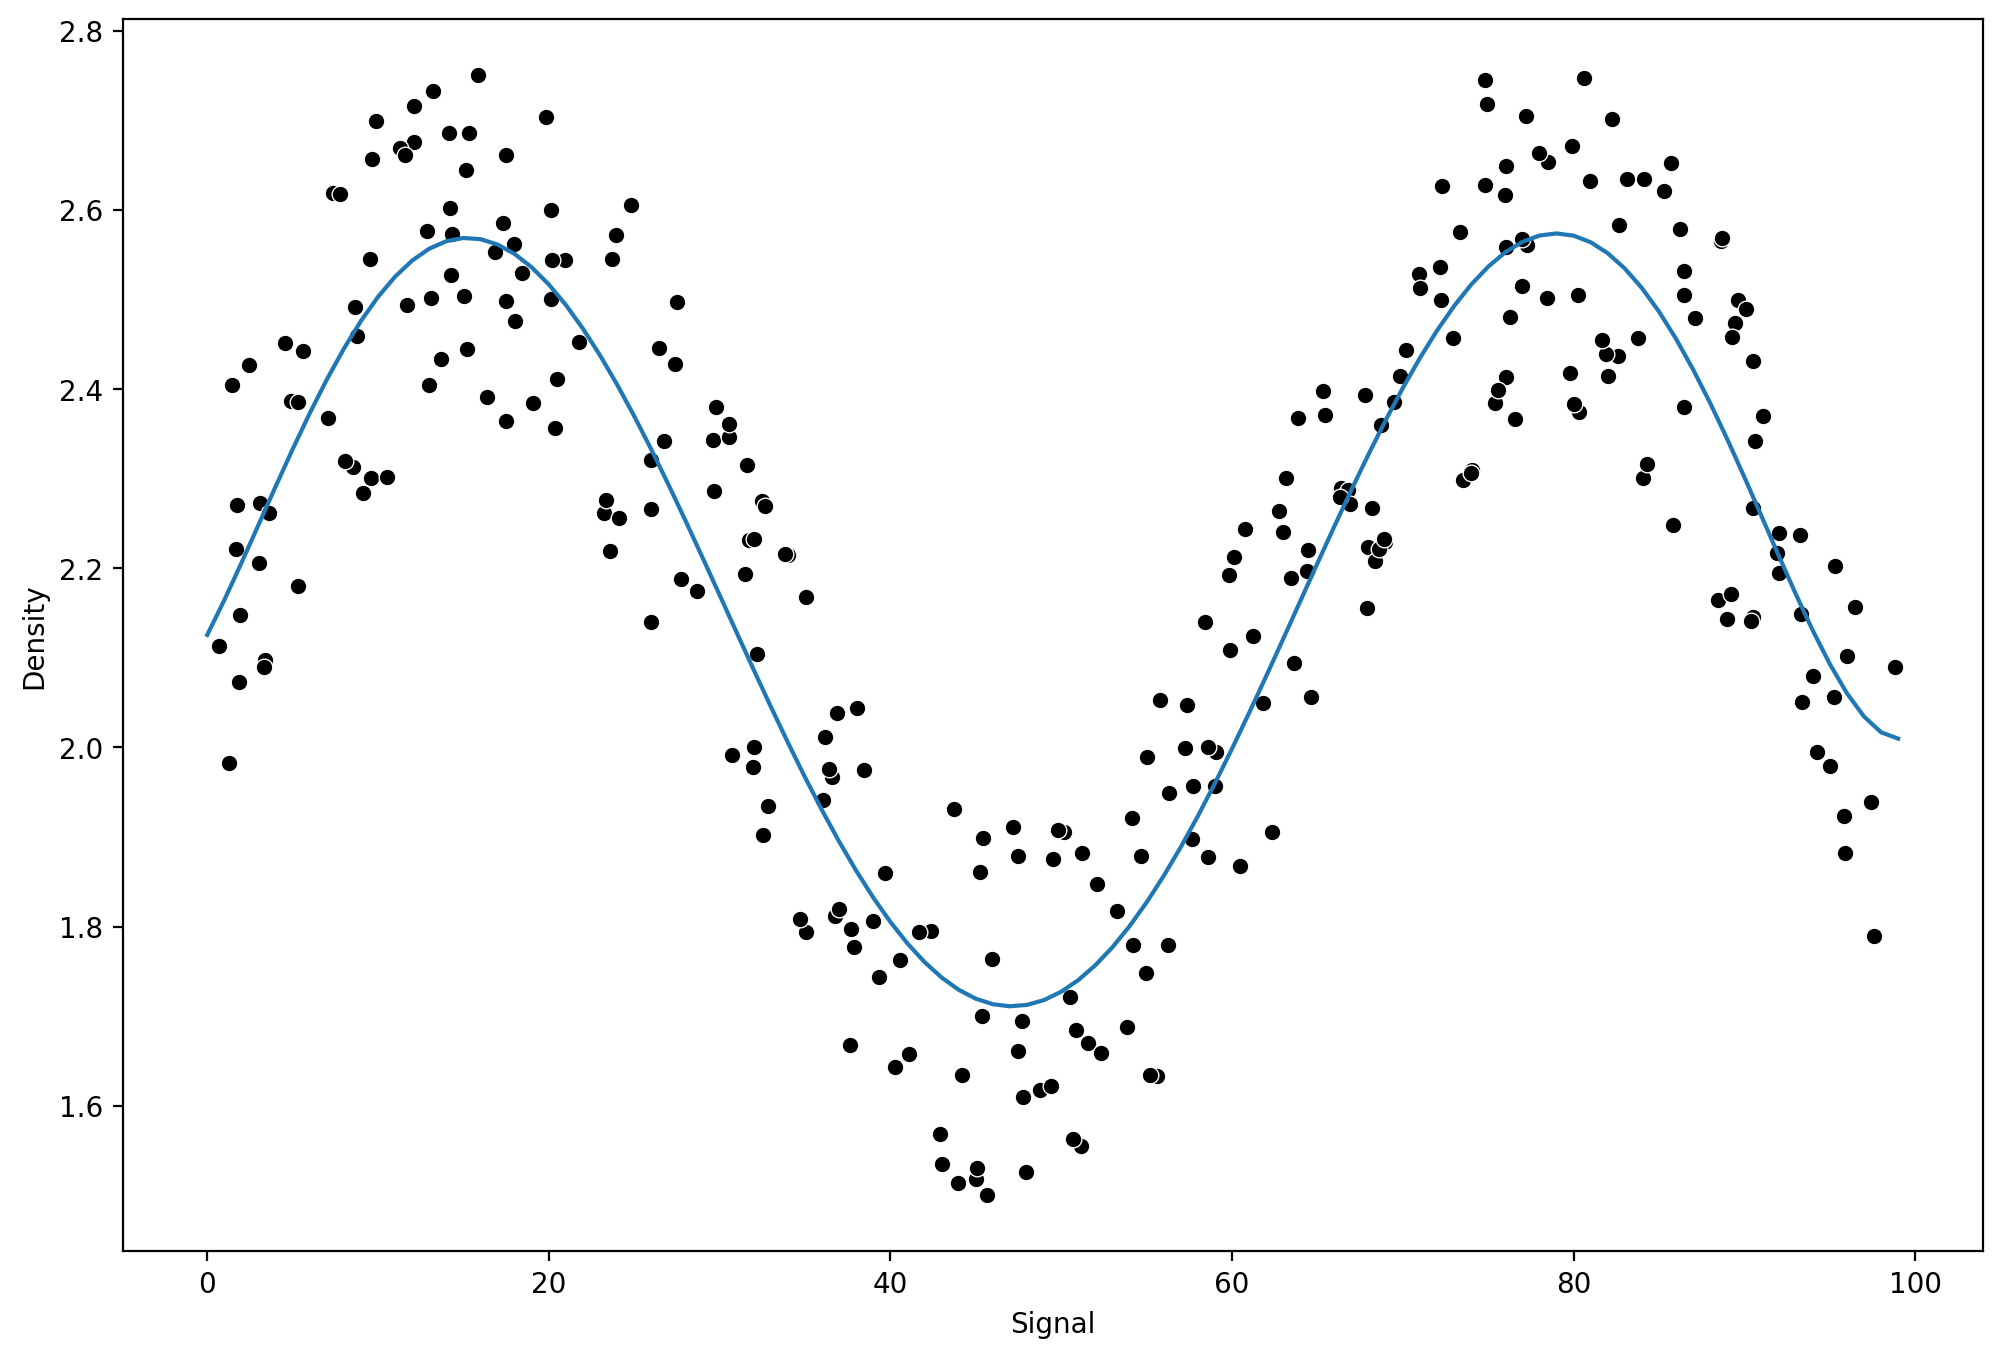

In [131]:
run_model(pipe,X_train,y_train,X_test,y_test)

TO SEE THE LIMIT OF THE MODEL HOW IT WILL PERFORM WELL

In [132]:
from sklearn.neighbors import KNeighborsRegressor

RMSE:0.1523487028635337
MAE:0.11877297474442378
RMSE:0.13730685016923647
MAE:0.12198383614100558
RMSE:0.13277855732740926
MAE:0.11635971693292672


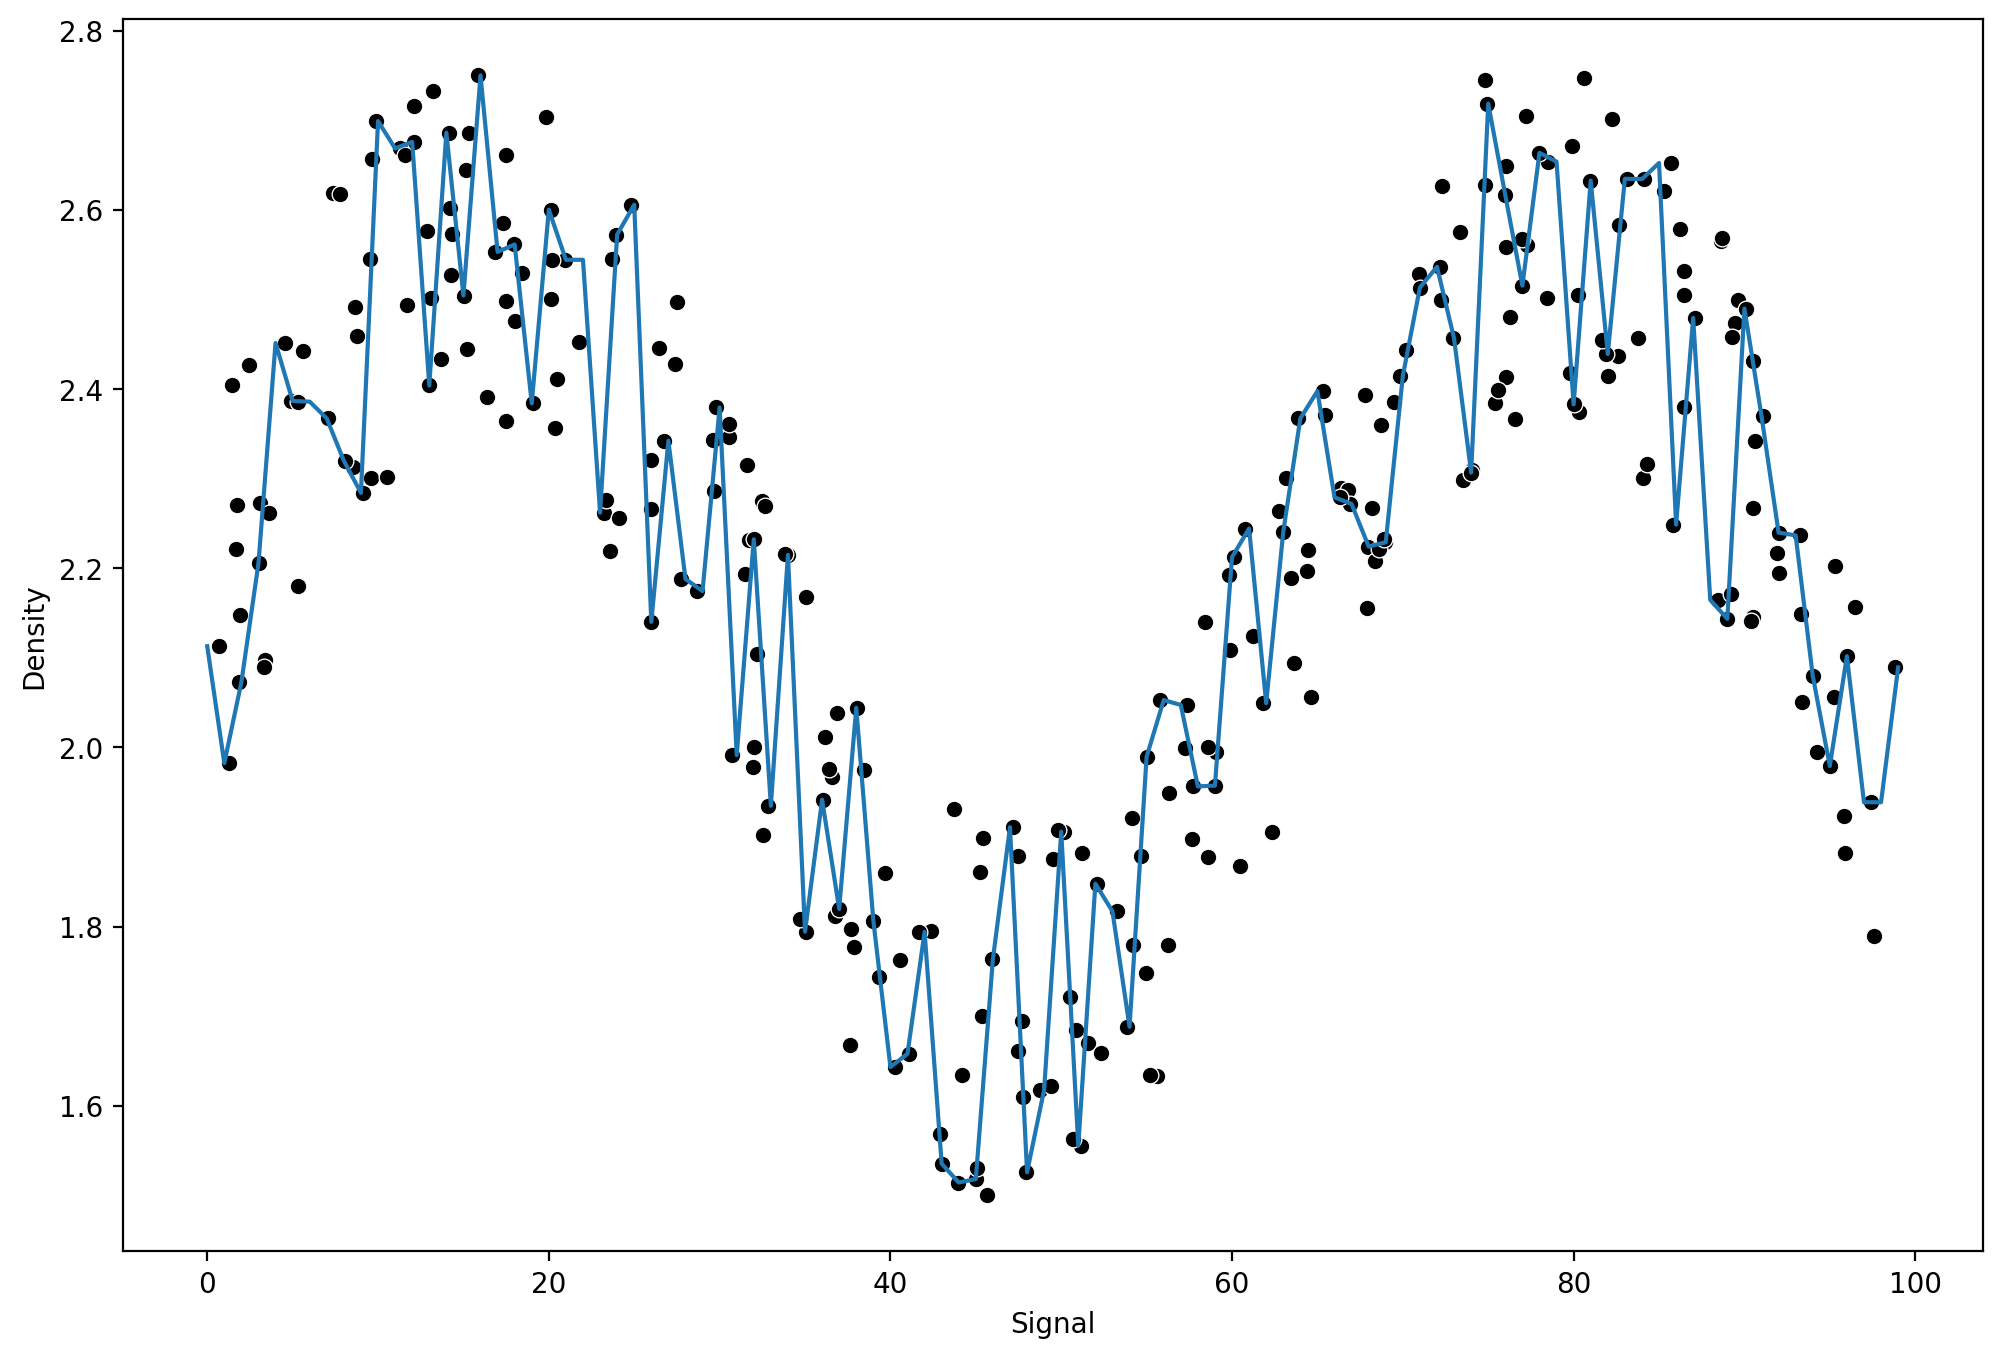

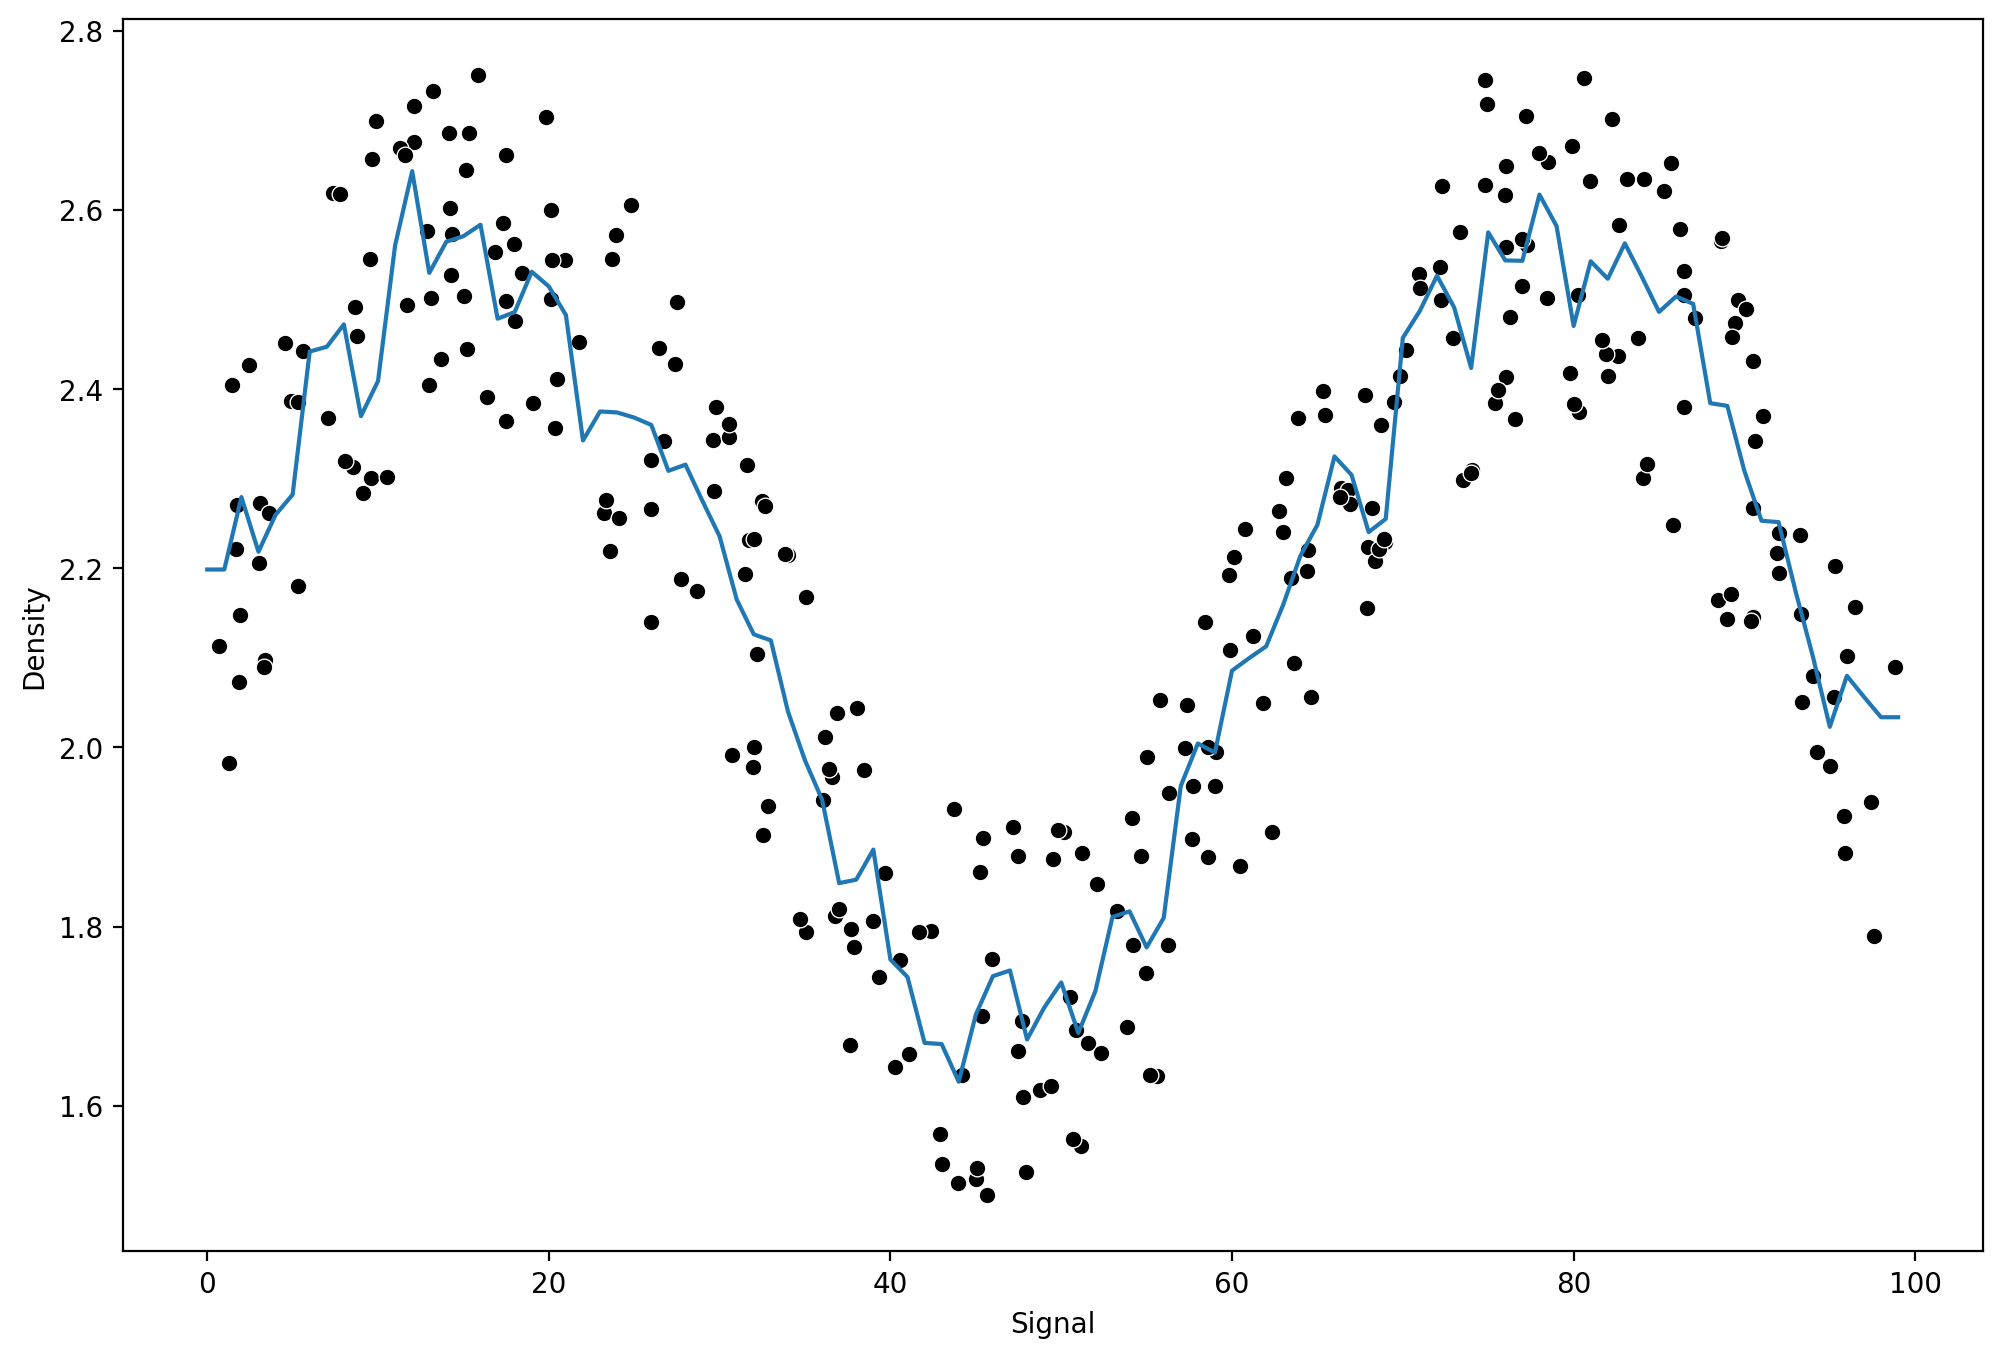

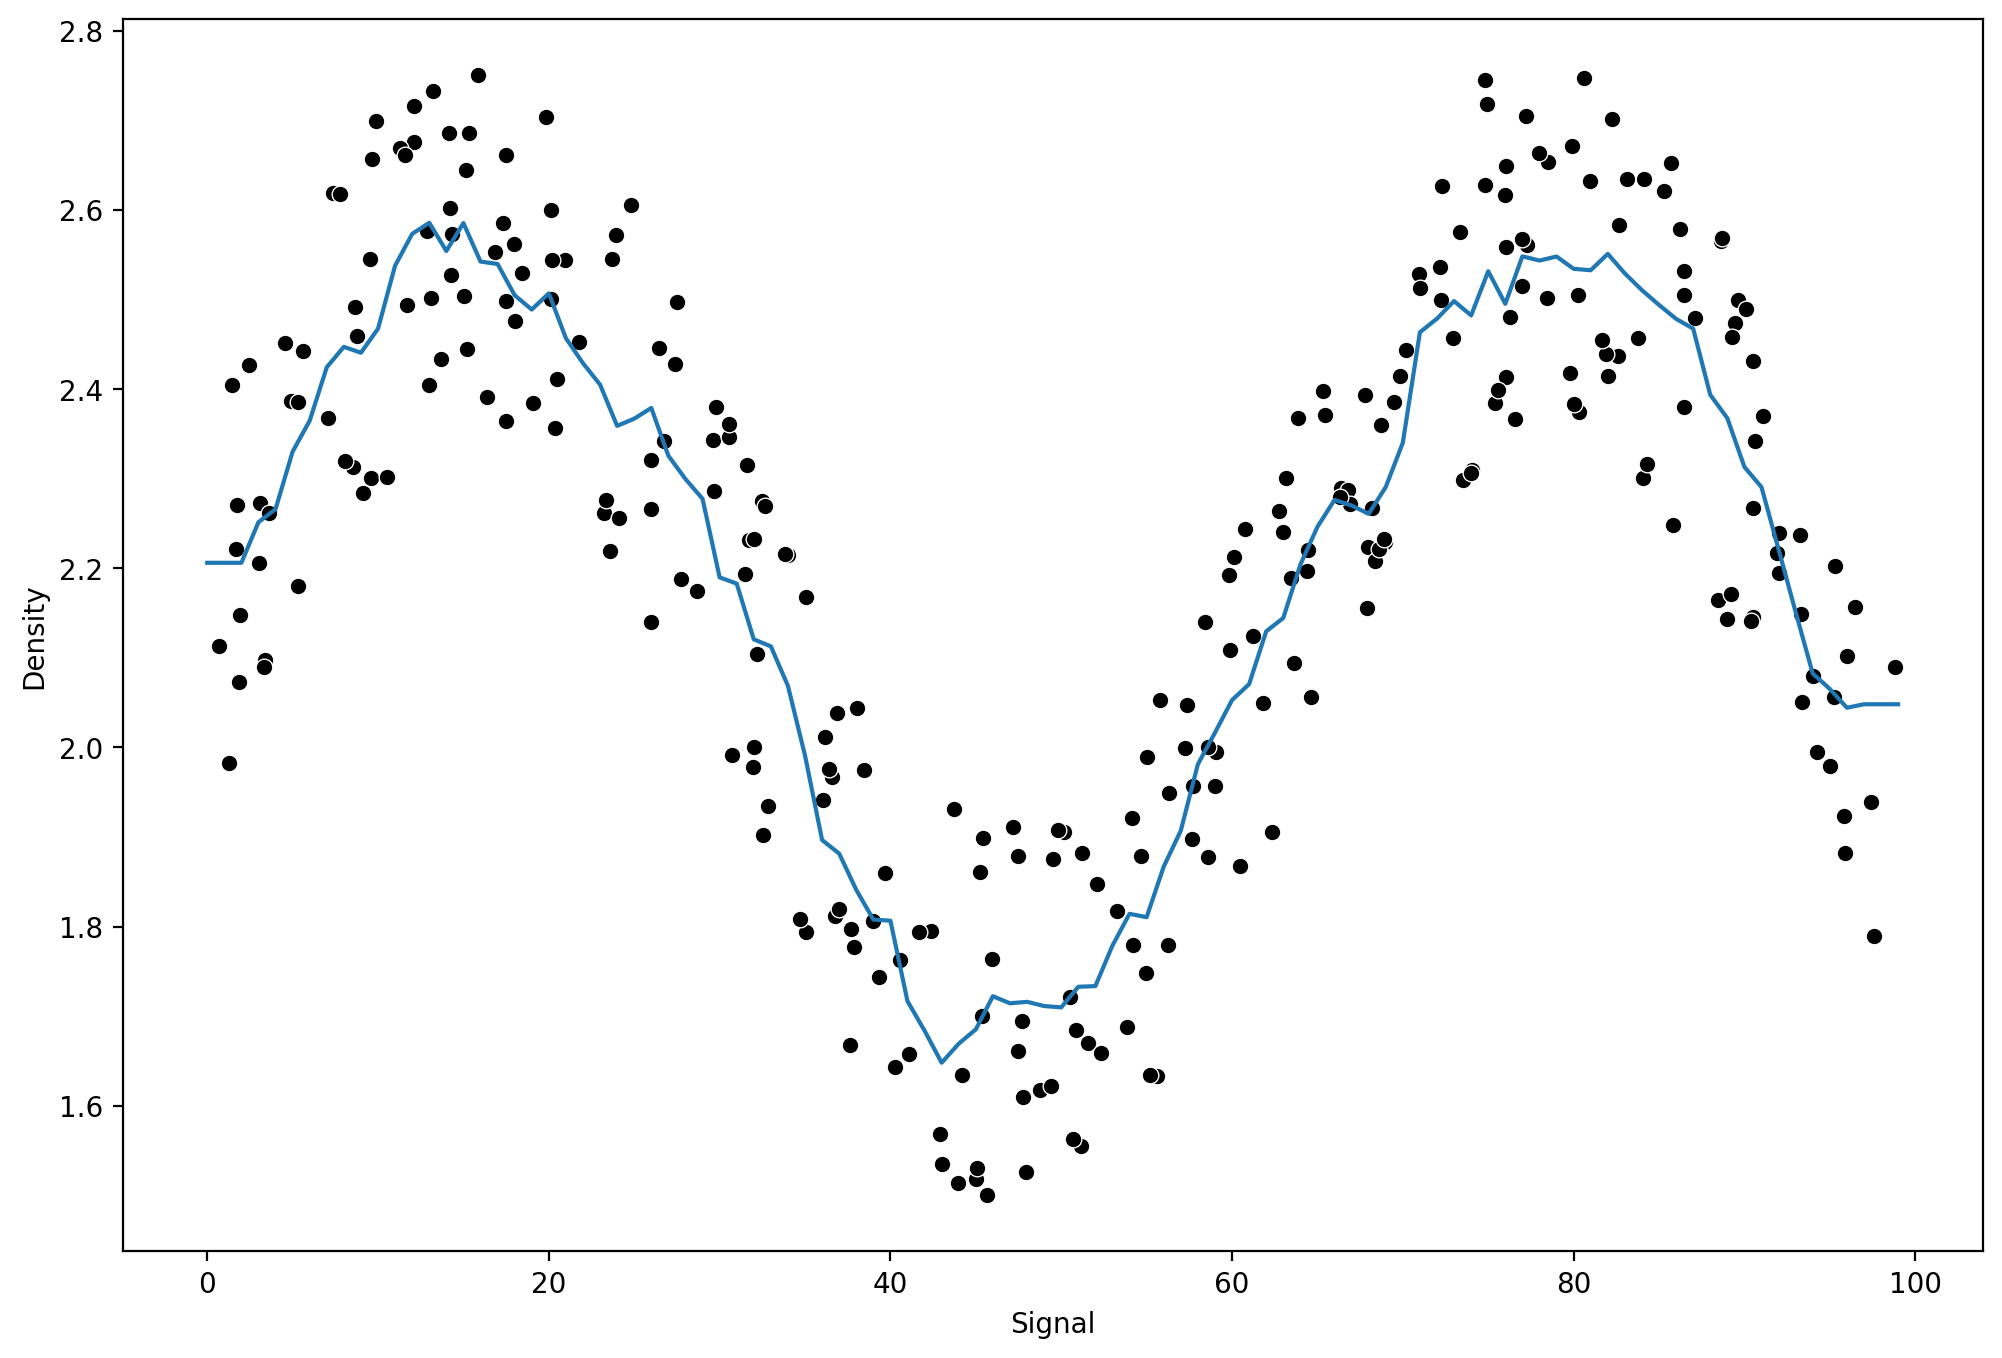

In [135]:
k_values=[1,5,10]
for n in k_values:
    model1=KNeighborsRegressor(n_neighbors=n)
    run_model(model1,X_train,y_train,X_test,y_test)
    

In [136]:
from sklearn.tree import DecisionTreeRegressor

RMSE:0.13277855732740926
MAE:0.11635971693292672


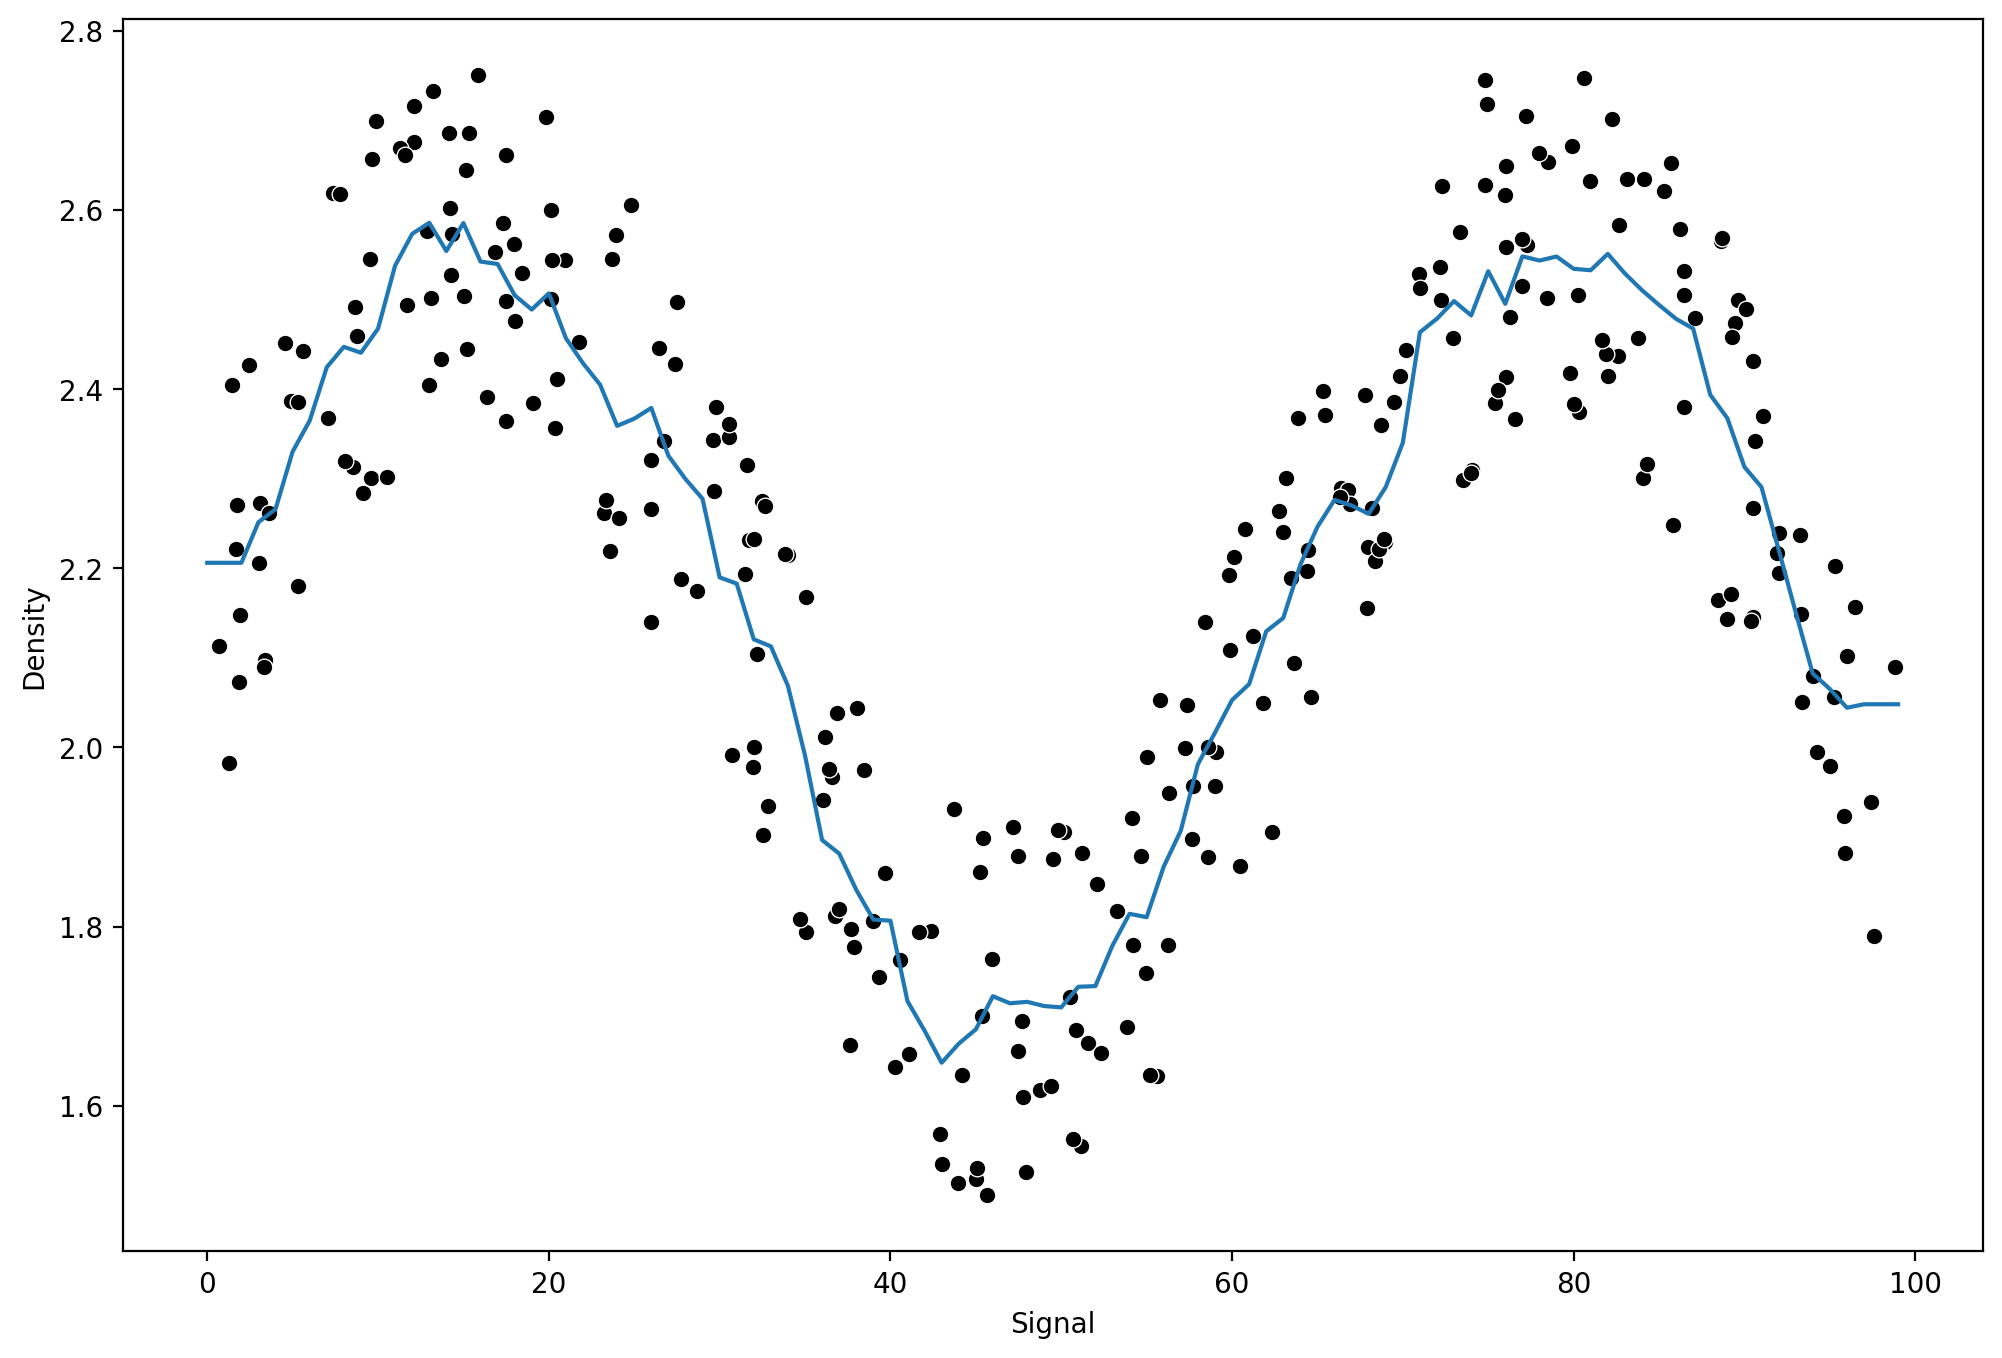

In [138]:
model=DecisionTreeRegressor()
run_model(model1,X_train,y_train,X_test,y_test)


In [139]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
svr=SVR()
param_grids={'C':[0.01,0.1,1,5,10,100,1000],
             'gamma':['auto','scale']}
grid=GridSearchCV(svr,param_grids)


RMSE:0.12646999302046696
MAE:0.10854210121348368


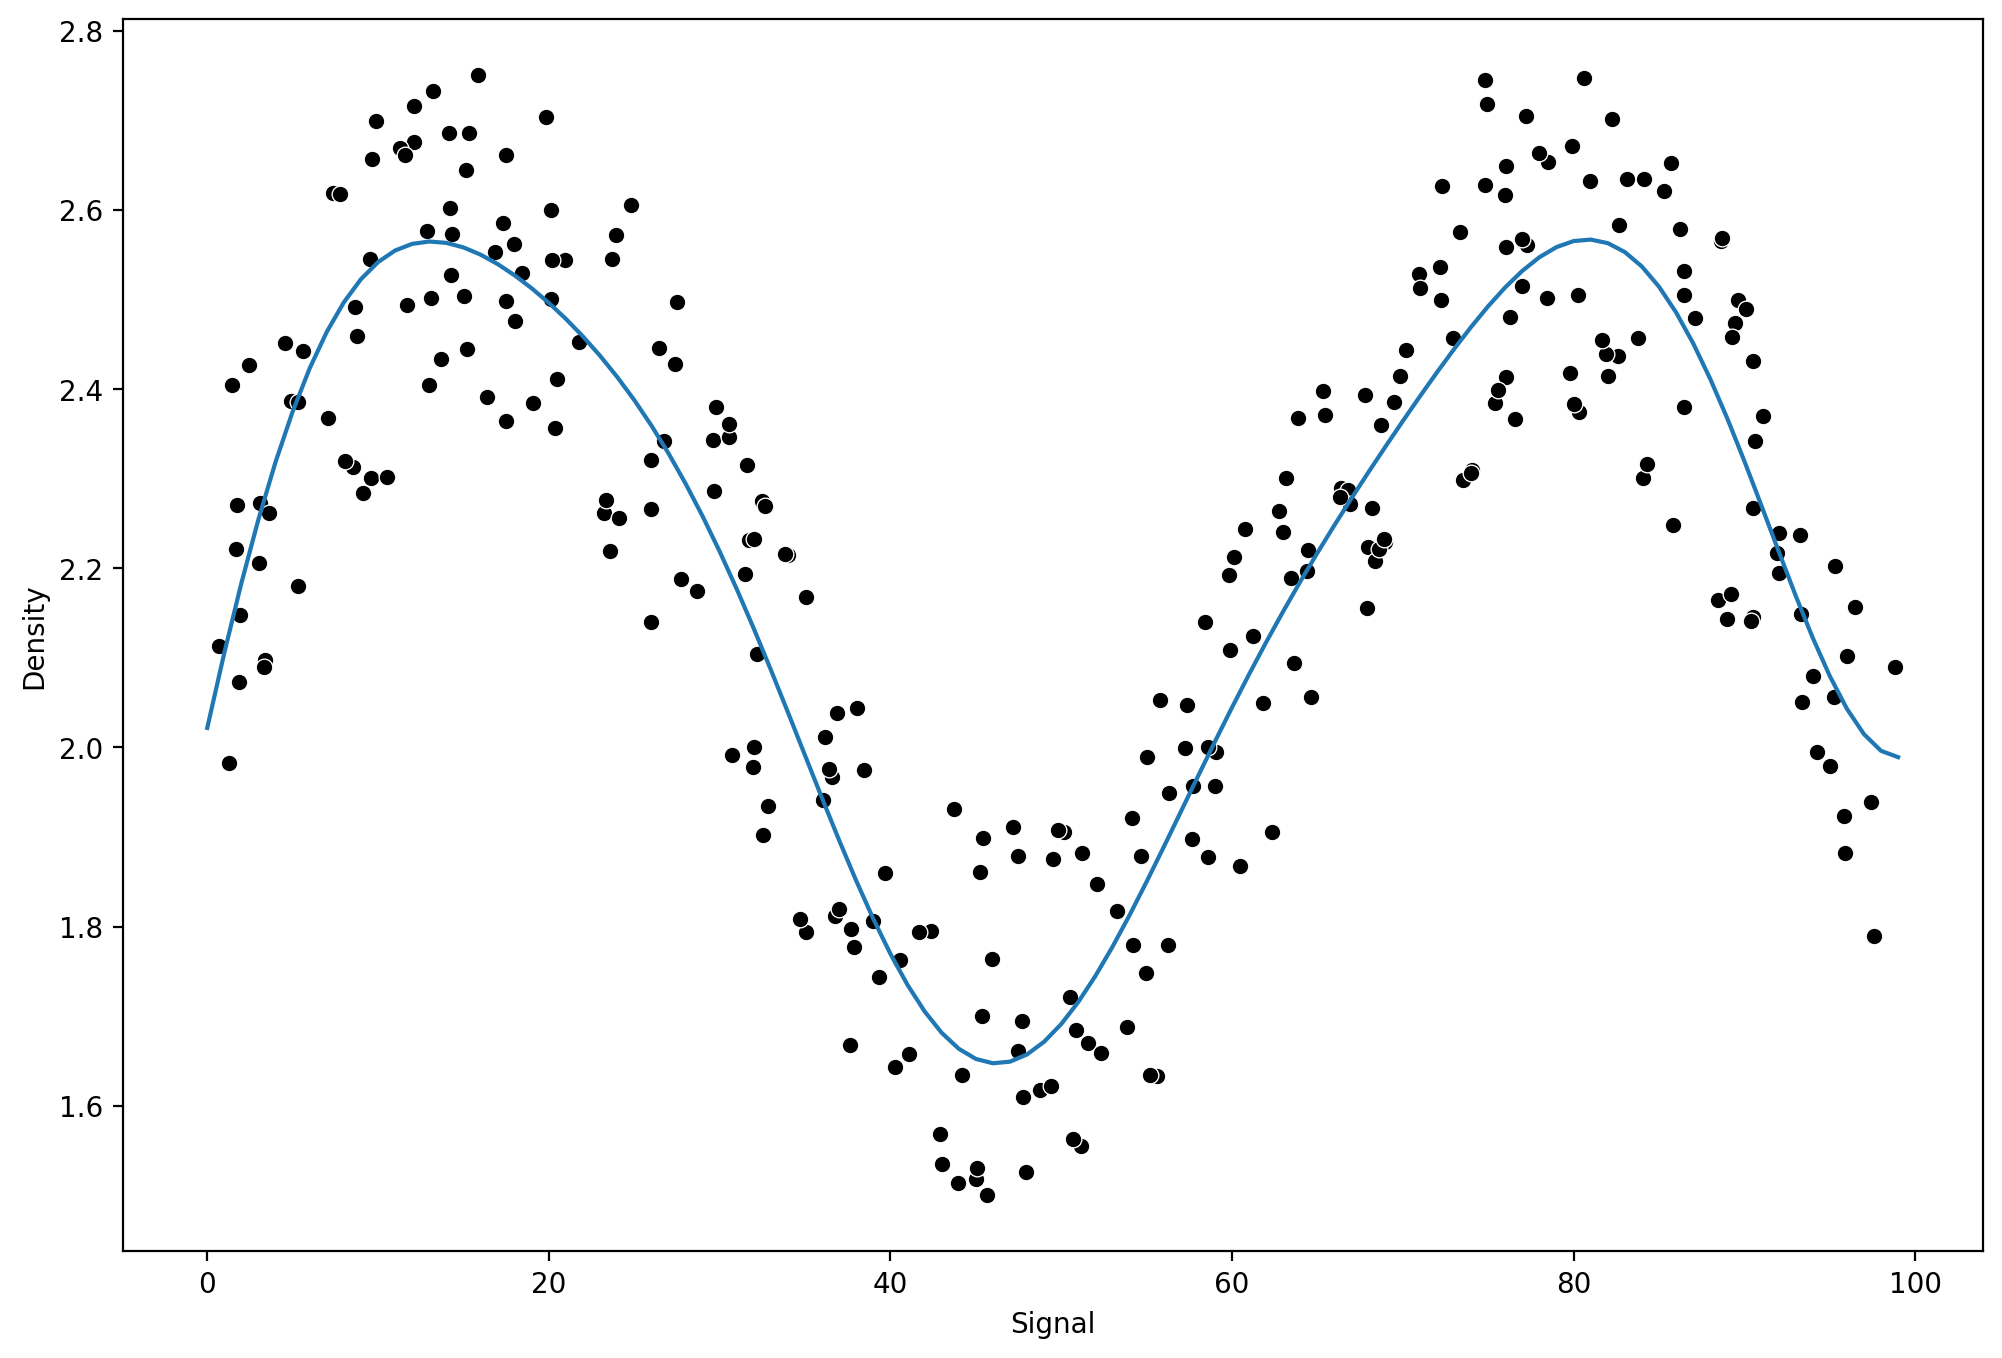

In [141]:
run_model(grid,X_train,y_train,X_test,y_test)

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rfr=RandomForestRegressor(n_estimators=10)

RMSE:0.1356333890498871
MAE:0.1095545105410433


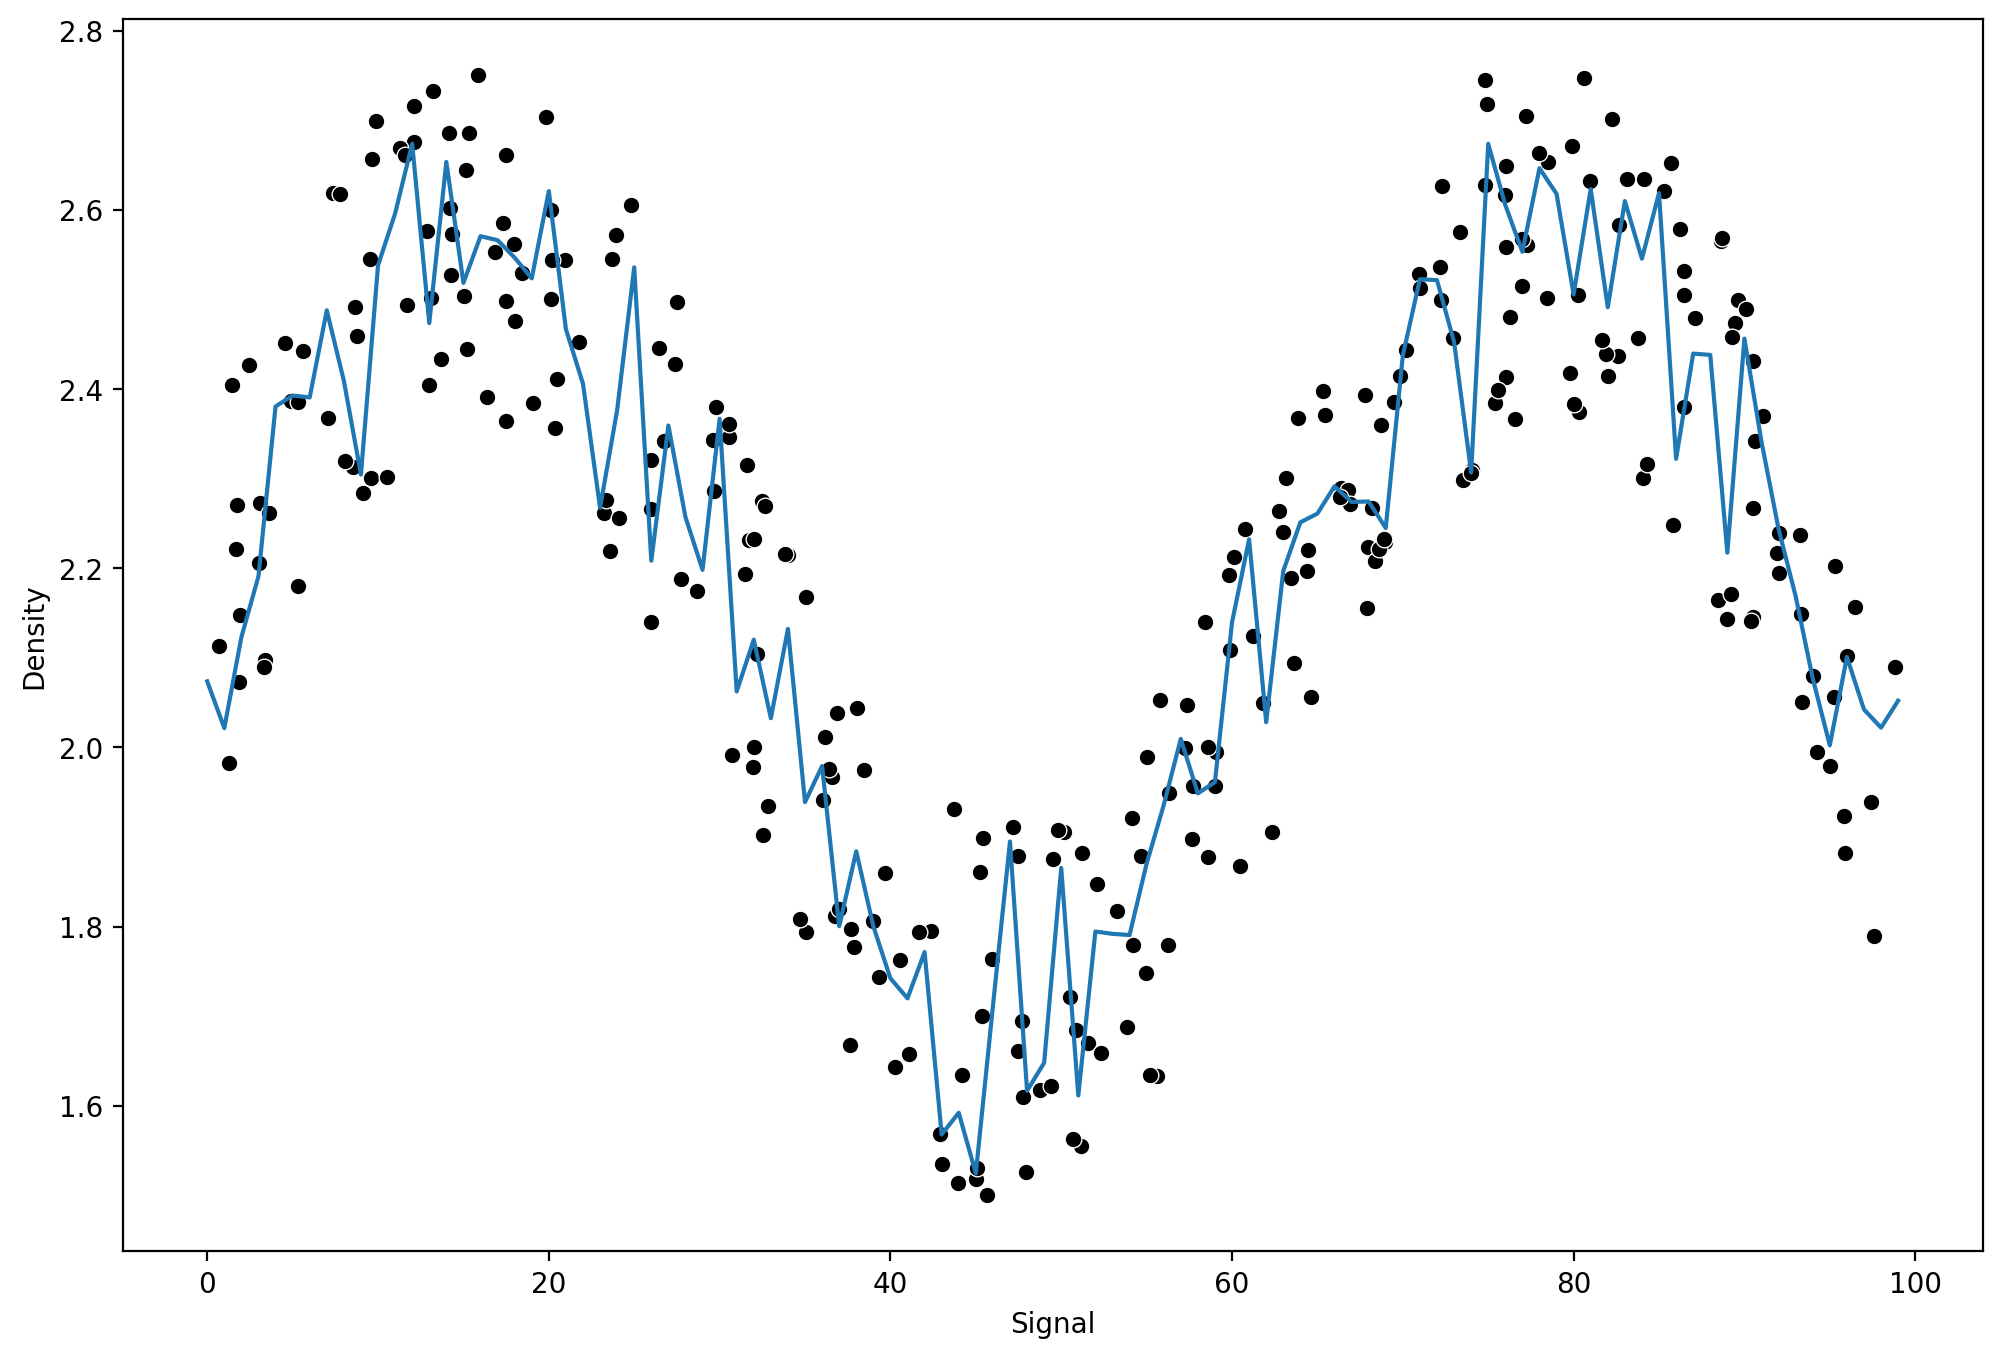

In [144]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [145]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [146]:
model=GradientBoostingRegressor()

RMSE:0.13294148649584667
MAE:0.11318284854800689


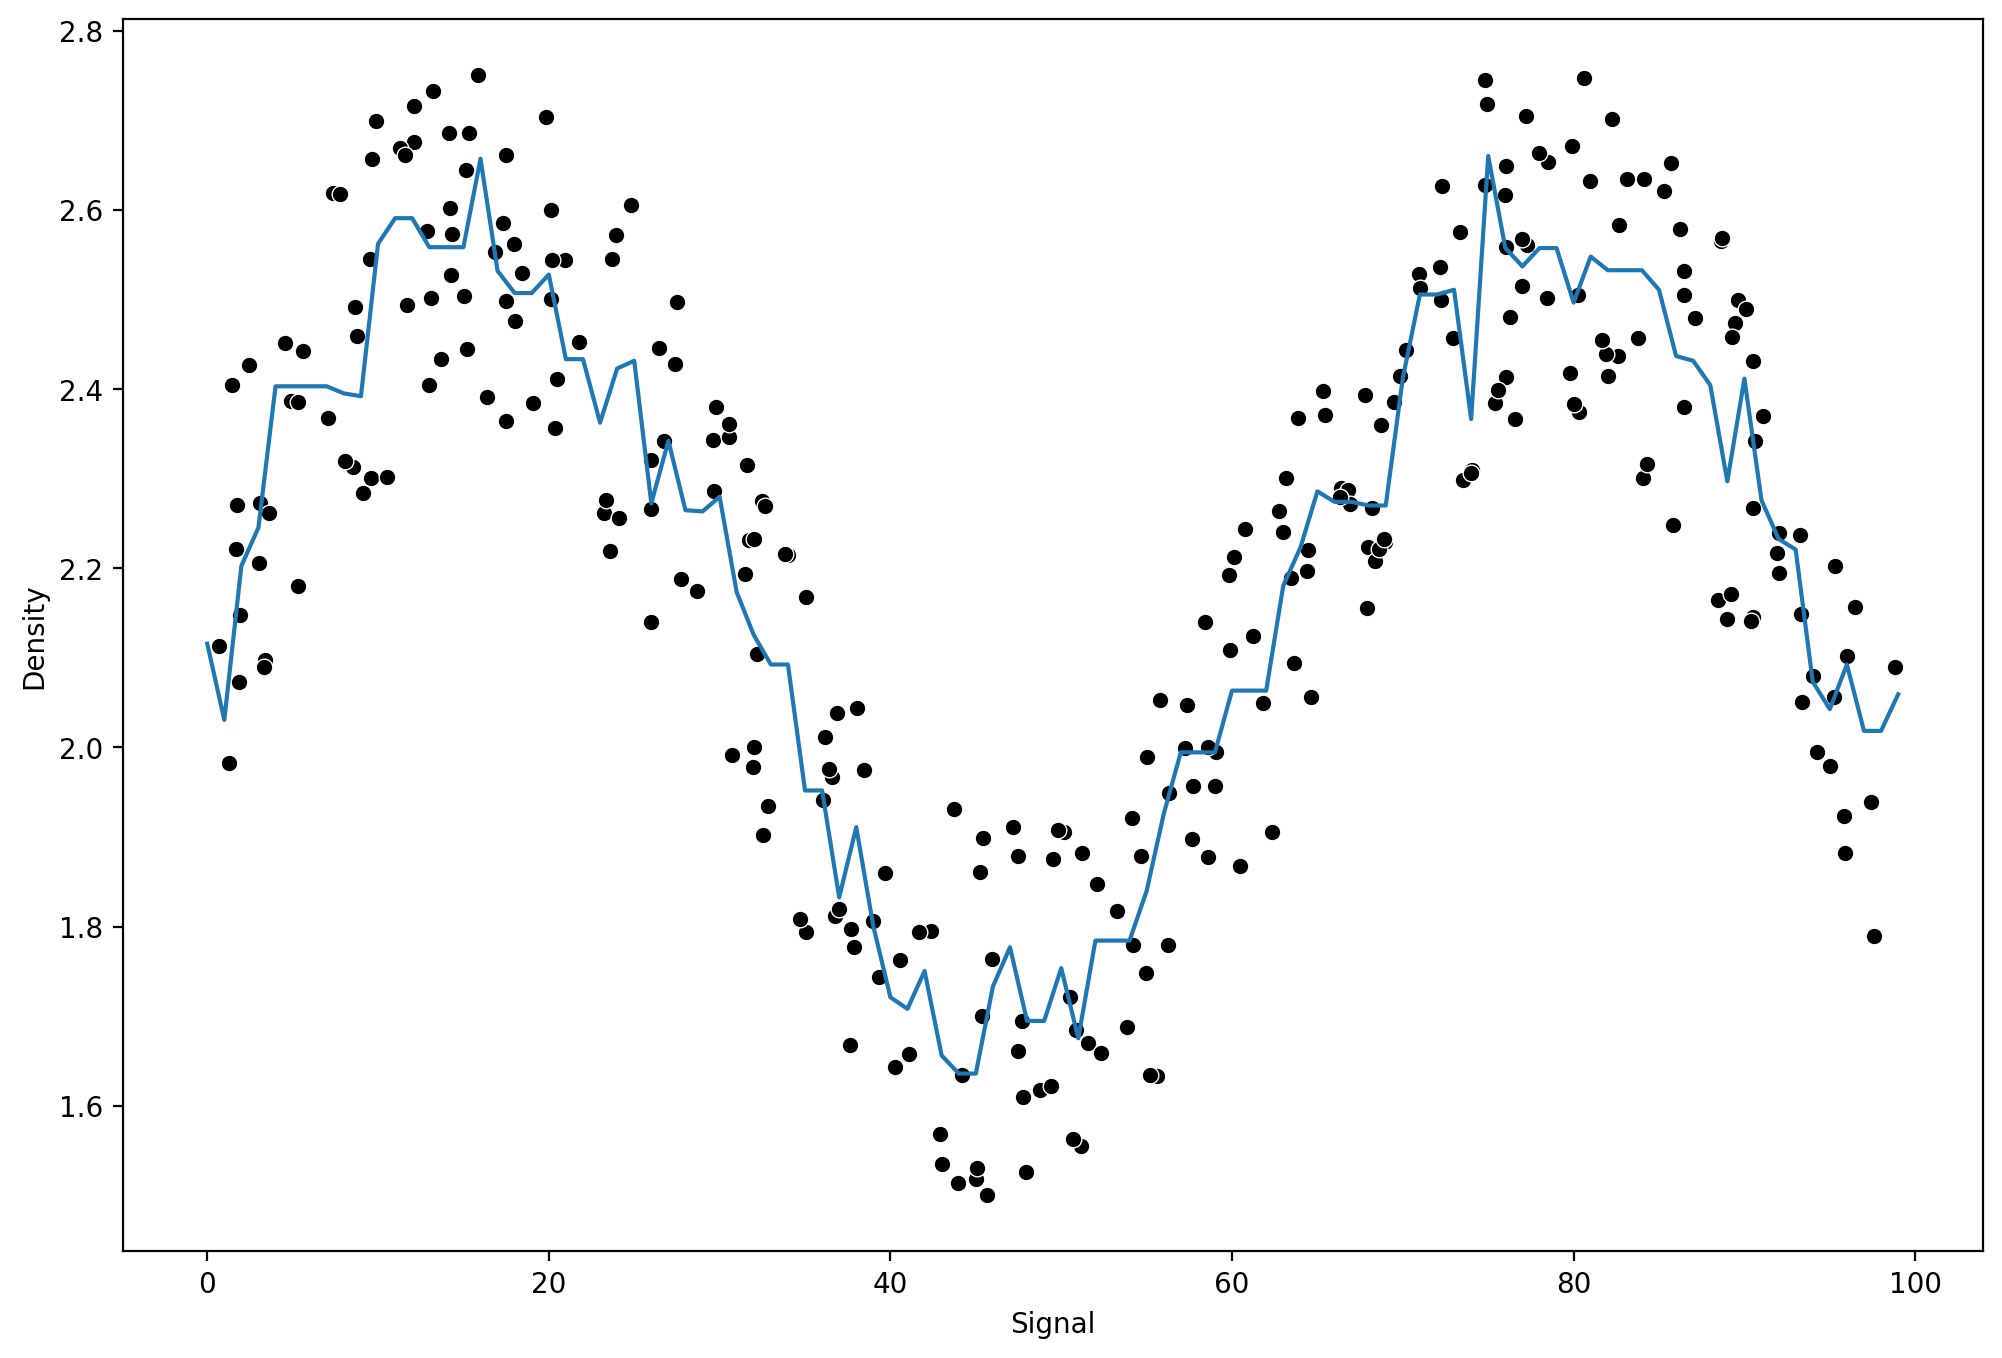

In [147]:
run_model(model,X_train,y_train,X_test,y_test)

In [148]:
ada_model=AdaBoostRegressor()

RMSE:0.13336518797295643
MAE:0.1131741702421374


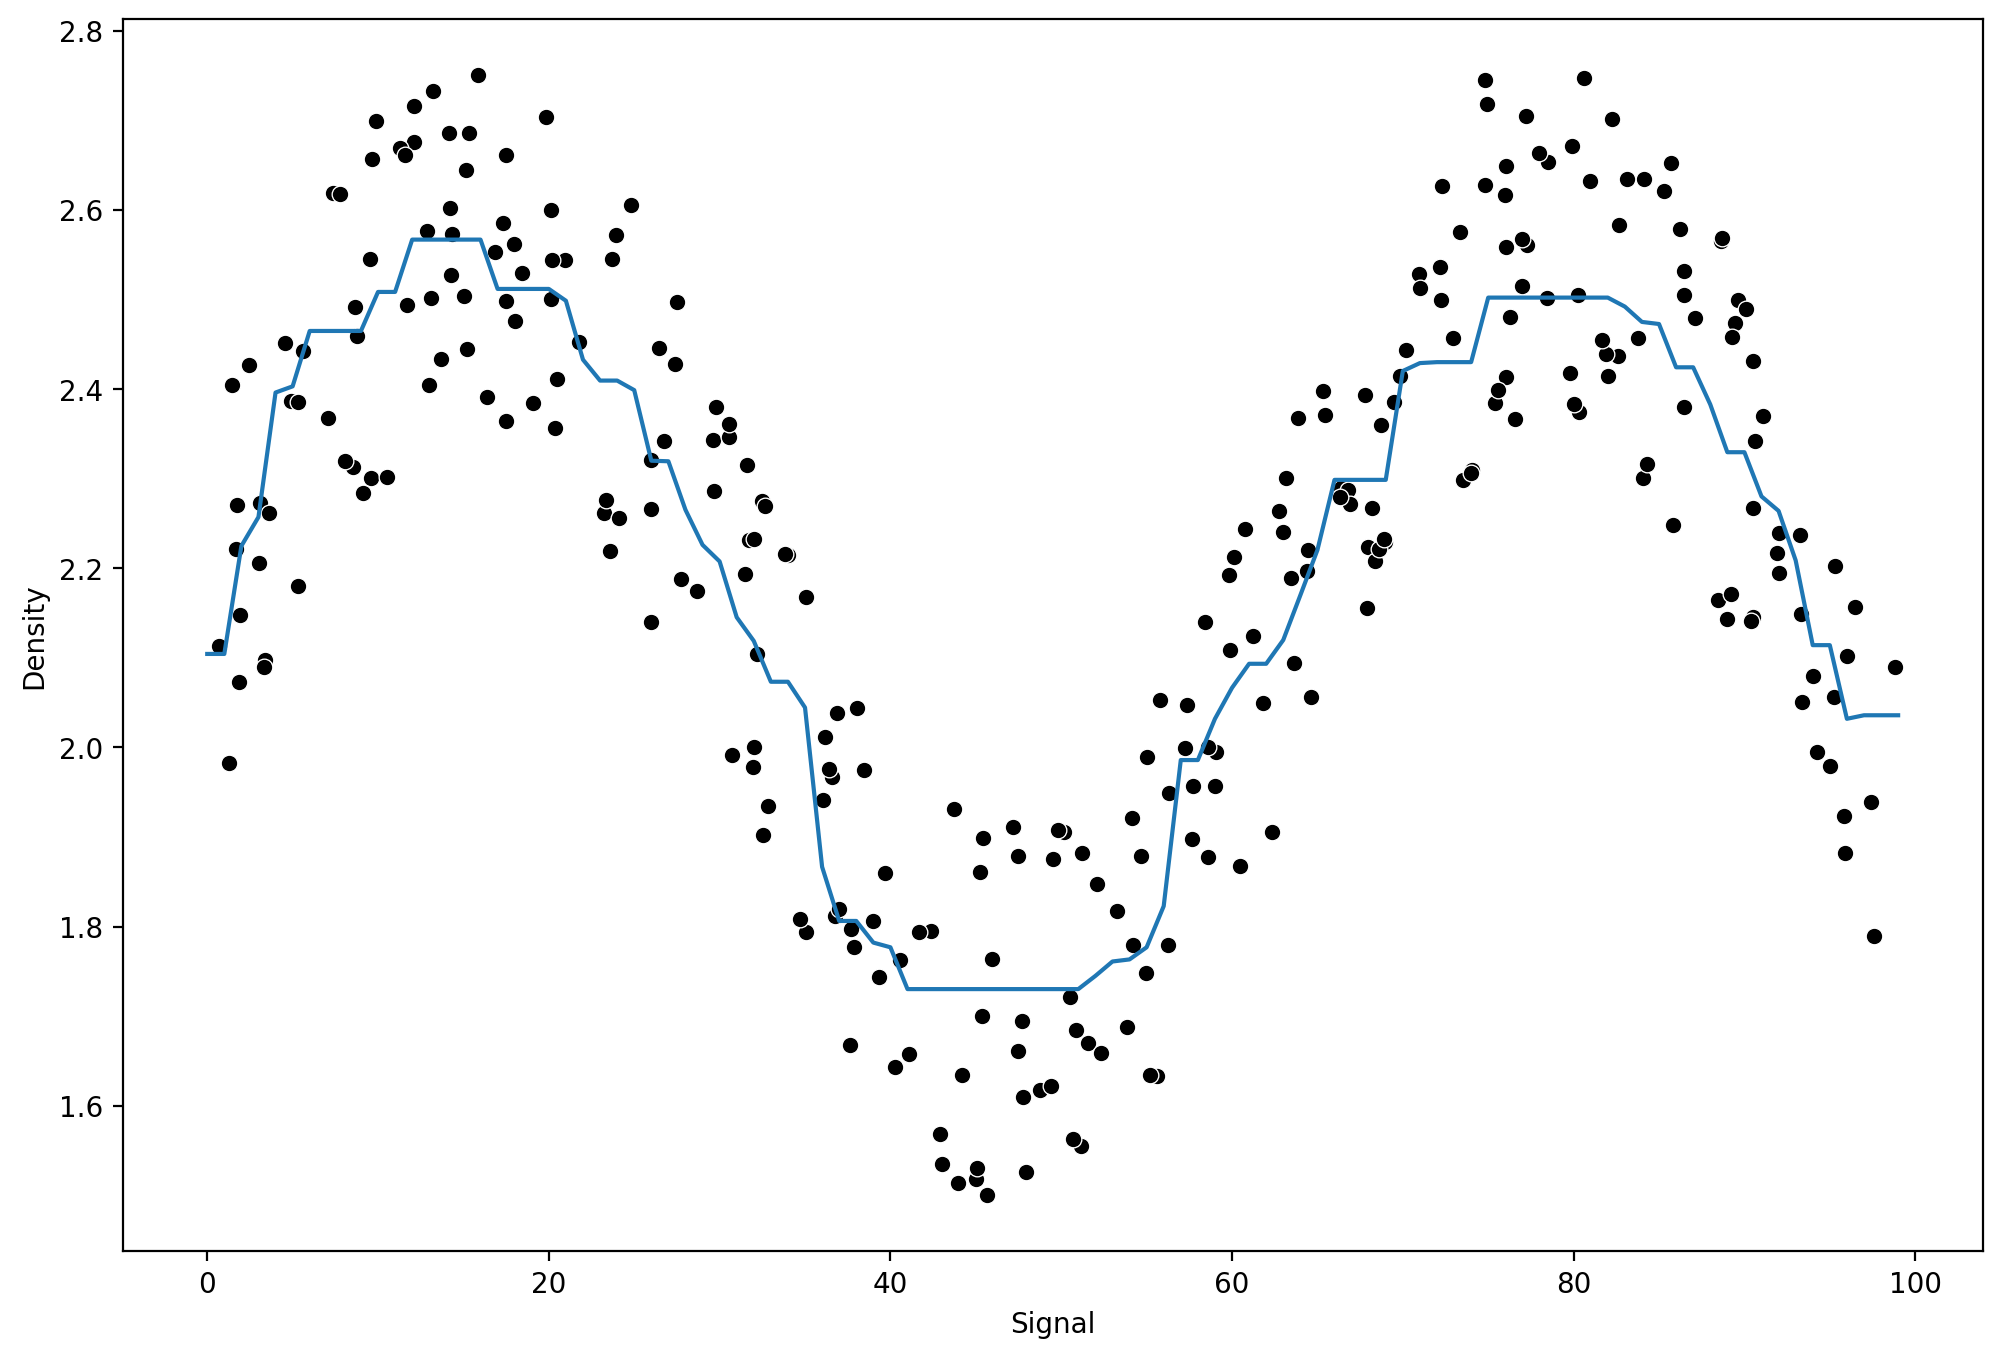

In [149]:
run_model(ada_model,X_train,y_train,X_test,y_test)